In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up ato 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporry files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
train_df=pd.read_csv("train.csv")

In [4]:
test_df=pd.read_csv("test.csv")

In [5]:
train_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,0


In [6]:
test_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,DQRTA8KWGC,51,99473,170353,628,24,1,17.03,12,0.46,PhD,Self-employed,Divorced,Yes,Yes,Auto,Yes
51066,W0FDMPACG3,29,42016,111314,371,51,4,7.10,36,0.50,PhD,Self-employed,Married,No,No,Other,No
51067,MA0F4U8ORY,67,88507,142666,731,51,1,22.89,48,0.79,Bachelor's,Part-time,Divorced,No,No,Education,No
51068,6QUH04P7EJ,42,116649,190938,488,6,1,10.83,60,0.32,Bachelor's,Full-time,Married,No,Yes,Other,Yes


In [7]:
train_df.shape

(204277, 18)

In [8]:
test_df.shape

(51070, 17)

In [9]:
train_df.drop_duplicates(inplace=True)

In [10]:
test_df.drop_duplicates(inplace=True)

In [11]:
train_df.shape     #so there are no duplicates

(204277, 18)

In [12]:
test_df.shape

(51070, 17)

In [13]:
train_df.isna().sum()      #no null values

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [14]:
test_df.isna().sum()      #no null values

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64

In [15]:
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000
mean,43.489340,82506.227980,127547.496395,574.075500,59.508511,2.502078,13.488147,36.010926,0.500579,0.116278
std,14.995191,38952.103374,70855.064746,158.877098,34.645589,1.116898,6.636060,16.944827,0.230914,0.320559
min,18.000000,15000.000000,5001.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48878.000000,66059.000000,437.000000,30.000000,2.000000,7.760000,24.000000,0.300000,0.000000
50%,43.000000,82400.000000,127603.000000,574.000000,59.000000,3.000000,13.450000,36.000000,0.500000,0.000000
75%,56.000000,116247.000000,188843.000000,712.000000,90.000000,4.000000,19.240000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [16]:
train_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,0


In [17]:
test_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,DQRTA8KWGC,51,99473,170353,628,24,1,17.03,12,0.46,PhD,Self-employed,Divorced,Yes,Yes,Auto,Yes
51066,W0FDMPACG3,29,42016,111314,371,51,4,7.10,36,0.50,PhD,Self-employed,Married,No,No,Other,No
51067,MA0F4U8ORY,67,88507,142666,731,51,1,22.89,48,0.79,Bachelor's,Part-time,Divorced,No,No,Education,No
51068,6QUH04P7EJ,42,116649,190938,488,6,1,10.83,60,0.32,Bachelor's,Full-time,Married,No,Yes,Other,Yes


 # Encoding Categorical Variables

In [18]:
train_df['Education'].unique()

array(['High School', "Master's", "Bachelor's", 'PhD'], dtype=object)

In [19]:
test_df['Education'].unique()

array(['PhD', 'High School', "Master's", "Bachelor's"], dtype=object)

In [20]:
education_mapping = {
    'High School': 1,
    "Bachelor's": 2,
    "Master's": 3,
    'PhD': 4
}

train_df['Education'] = train_df['Education'].map(education_mapping)
print(train_df['Education'].head())


0    1
1    1
2    3
3    2
4    2
Name: Education, dtype: int64


In [21]:
test_df['Education'] = test_df['Education'].map(education_mapping)
print(test_df['Education'].head())

0    4
1    1
2    3
3    1
4    4
Name: Education, dtype: int64


In [22]:
train_df['EmploymentType'].unique()

array(['Self-employed', 'Unemployed', 'Part-time', 'Full-time'],
      dtype=object)

In [23]:
test_df['EmploymentType'].unique()

array(['Self-employed', 'Part-time', 'Unemployed', 'Full-time'],
      dtype=object)

In [24]:
employment_type_mapping = {
    'Unemployed': 1,
    'Part-time': 2,
    'Self-employed': 3,
    'Full-time': 4
}

train_df['EmploymentType'] = train_df['EmploymentType'].map(employment_type_mapping)

print(train_df['EmploymentType'].head())


0    3
1    1
2    3
3    3
4    2
Name: EmploymentType, dtype: int64


In [25]:
test_df['EmploymentType'] = test_df['EmploymentType'].map(employment_type_mapping)

print(test_df['EmploymentType'].head())


0    3
1    2
2    2
3    2
4    1
Name: EmploymentType, dtype: int64


In [26]:
train_df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [27]:
test_df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [28]:
marital_status_mapping = {
    'Single': 1,
    'Divorced': 2,
    'Married': 3
}

train_df['MaritalStatus'] = train_df['MaritalStatus'].map(marital_status_mapping)

print(train_df['MaritalStatus'].head())


0    1
1    2
2    3
3    1
4    1
Name: MaritalStatus, dtype: int64


In [29]:
test_df['MaritalStatus'] = test_df['MaritalStatus'].map(marital_status_mapping)

print(test_df['MaritalStatus'].head())


0    1
1    2
2    3
3    1
4    1
Name: MaritalStatus, dtype: int64


In [30]:
train_df['HasMortgage'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
test_df['HasMortgage'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
mortgage_mapping = {
    'No': 0,
    'Yes': 1
}

train_df['HasMortgage'] = train_df['HasMortgage'].map(mortgage_mapping)

print(train_df['HasMortgage'].head())


0    1
1    0
2    0
3    1
4    0
Name: HasMortgage, dtype: int64


In [33]:
test_df['HasMortgage'] = test_df['HasMortgage'].map(mortgage_mapping)

print(test_df['HasMortgage'].head())


0    1
1    1
2    1
3    0
4    0
Name: HasMortgage, dtype: int64


In [34]:
train_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,1,3,1,1,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,1,1,2,0,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,3,3,3,0,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,2,3,1,1,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,2,2,1,0,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,2,2,2,0,No,Home,Yes,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,2,3,1,0,No,Business,Yes,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,4,4,1,1,No,Auto,No,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,1,3,3,1,No,Home,No,0


In [35]:
test_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,4,3,1,1,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,1,2,2,1,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,3,2,3,1,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,1,2,1,0,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,4,1,1,0,Yes,Business,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,DQRTA8KWGC,51,99473,170353,628,24,1,17.03,12,0.46,4,3,2,1,Yes,Auto,Yes
51066,W0FDMPACG3,29,42016,111314,371,51,4,7.10,36,0.50,4,3,3,0,No,Other,No
51067,MA0F4U8ORY,67,88507,142666,731,51,1,22.89,48,0.79,2,2,2,0,No,Education,No
51068,6QUH04P7EJ,42,116649,190938,488,6,1,10.83,60,0.32,2,4,3,0,Yes,Other,Yes


In [36]:
train_df['HasDependents'].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
test_df['HasDependents'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
dependents_mapping = {
    'No': 0,
    'Yes': 1
}

train_df['HasDependents'] = train_df['HasDependents'].map(dependents_mapping)

print(train_df['HasDependents'].head())


0    0
1    1
2    0
3    0
4    1
Name: HasDependents, dtype: int64


In [39]:
test_df['HasDependents'] = test_df['HasDependents'].map(dependents_mapping)

print(test_df['HasDependents'].head())

0    1
1    1
2    1
3    0
4    1
Name: HasDependents, dtype: int64


In [40]:
train_df['LoanPurpose'].unique()

array(['Business', 'Education', 'Other', 'Auto', 'Home'], dtype=object)

In [41]:
test_df['LoanPurpose'].unique()

array(['Home', 'Education', 'Business', 'Other', 'Auto'], dtype=object)

In [42]:
# One-hot encode the 'LoanPurpose' column with 0's and 1's
loan_purpose_encoded = pd.get_dummies(train_df['LoanPurpose'], prefix='LoanPurpose')

# Convert the encoded columns to integers (just in case)
loan_purpose_encoded = loan_purpose_encoded.astype(int)

# Concatenate the new columns with the original DataFrame and drop the original 'LoanPurpose' column
train_df = pd.concat([train_df, loan_purpose_encoded], axis=1)
train_df.drop('LoanPurpose', axis=1, inplace=True)

# Check the result
print(train_df.head())



       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  DRIRC89L0T   18  137576      209136          846              26   
1  TS0FIUNHNU   47   57194        5970          748              30   
2  I0YR284A1V   26   84328       95065          453               7   
3  WB1T7NQV8A   53   49795      229582          533             107   
4  J6GU9M4G1Z   49  115450       22072          840               0   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ...  MaritalStatus  \
0               2         10.47        60      0.81  ...              1   
1               2         19.72        36      0.73  ...              2   
2               2         24.25        12      0.45  ...              3   
3               3         14.44        60      0.17  ...              1   
4               4         24.48        12      0.11  ...              1   

   HasMortgage  HasDependents  HasCoSigner  Default LoanPurpose_Auto  \
0            1              0           No        

In [43]:
# One-hot encode the 'LoanPurpose' column with 0's and 1's
loan_purpose_encoded_2 = pd.get_dummies(test_df['LoanPurpose'], prefix='LoanPurpose')

# Convert the encoded columns to integers (just in case)
loan_purpose_encoded_2 = loan_purpose_encoded_2.astype(int)

# Concatenate the new columns with the original DataFrame and drop the original 'LoanPurpose' column
test_df = pd.concat([test_df, loan_purpose_encoded_2], axis=1)
test_df.drop('LoanPurpose', axis=1, inplace=True)

# Check the result
print(test_df.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  CKV34LU7V7   55  112656       92393          581             113   
1  62KTYNH93J   56   91569      131575          641              54   
2  JGFUSOIUH7   26   78169       75417          569             105   
3  4538THBHOX   26   63033       10804          326             118   
4  DXLNA06JHR   24   29665       21182          662             102   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ...  EmploymentType  \
0               2         23.54        36      0.15  ...               3   
1               1         15.19        12      0.43  ...               2   
2               3         18.02        12      0.29  ...               2   
3               1         14.71        24      0.41  ...               2   
4               3         15.02        60      0.69  ...               1   

   MaritalStatus  HasMortgage  HasDependents  HasCoSigner LoanPurpose_Auto  \
0              1            1         

In [44]:
cols = [col for col in train_df if col != 'Default'] + ['Default']
train_df = train_df[cols]

In [45]:
train_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,...,1,1,0,No,0,1,0,0,0,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,...,2,0,1,No,0,0,1,0,0,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,...,3,0,0,Yes,0,0,0,0,1,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,...,1,1,0,Yes,1,0,0,0,0,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,...,1,0,1,Yes,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,...,2,0,0,Yes,0,0,0,1,0,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,...,1,0,0,Yes,0,1,0,0,0,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,...,1,1,0,No,1,0,0,0,0,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,...,3,1,0,No,0,0,0,1,0,0


In [46]:
test_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,...,3,1,1,1,No,0,0,0,1,0
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,...,2,2,1,1,Yes,0,0,1,0,0
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,...,2,3,1,1,Yes,0,0,1,0,0
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,...,2,1,0,0,Yes,0,1,0,0,0
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,...,1,1,0,1,Yes,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,DQRTA8KWGC,51,99473,170353,628,24,1,17.03,12,0.46,...,3,2,1,1,Yes,1,0,0,0,0
51066,W0FDMPACG3,29,42016,111314,371,51,4,7.10,36,0.50,...,3,3,0,0,No,0,0,0,0,1
51067,MA0F4U8ORY,67,88507,142666,731,51,1,22.89,48,0.79,...,2,2,0,0,No,0,0,1,0,0
51068,6QUH04P7EJ,42,116649,190938,488,6,1,10.83,60,0.32,...,4,3,0,1,Yes,0,0,0,0,1


In [47]:
train_df['HasCoSigner'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
test_df['HasCoSigner'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
cosigner_mapping = {
    'No': 0,
    'Yes': 1
}

train_df['HasCoSigner'] = train_df['HasCoSigner'].map(cosigner_mapping)

print(train_df['HasCoSigner'].head())

0    0
1    0
2    1
3    1
4    1
Name: HasCoSigner, dtype: int64


In [50]:
test_df['HasCoSigner'] = test_df['HasCoSigner'].map(cosigner_mapping)

print(test_df['HasCoSigner'].head())

0    0
1    1
2    1
3    1
4    1
Name: HasCoSigner, dtype: int64


In [51]:
train_df.describe()    #only loan_id is not there

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,...,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Default
count,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,...,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000,204277.000000
mean,43.489340,82506.227980,127547.496395,574.075500,59.508511,2.502078,13.488147,36.010926,0.500579,2.497765,...,2.001439,0.500032,0.500203,0.500281,0.199391,0.200630,0.199998,0.200111,0.199871,0.116278
std,14.995191,38952.103374,70855.064746,158.877098,34.645589,1.116898,6.636060,16.944827,0.230914,1.117542,...,0.816363,0.500001,0.500001,0.500001,0.399544,0.400472,0.400000,0.400084,0.399904,0.320559
min,18.000000,15000.000000,5001.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48878.000000,66059.000000,437.000000,30.000000,2.000000,7.760000,24.000000,0.300000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,82400.000000,127603.000000,574.000000,59.000000,3.000000,13.450000,36.000000,0.500000,2.000000,...,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,116247.000000,188843.000000,712.000000,90.000000,4.000000,19.240000,48.000000,0.700000,3.000000,...,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,4.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
test_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
count,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000,51070.000000
mean,43.534169,82471.611474,127704.340141,575.019718,59.675837,2.496867,13.511278,36.085765,0.498745,2.490112,2.498218,1.999922,0.499941,0.500529,0.499413,0.198022,0.201958,0.198747,0.203799,0.197474
std,14.970605,39006.993391,70783.797718,159.010208,34.634536,1.117497,6.638008,17.067022,0.230924,1.115880,1.118569,0.818030,0.500005,0.500005,0.500005,0.398513,0.401465,0.399061,0.402825,0.398097
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48616.750000,66506.250000,437.000000,30.000000,1.000000,7.800000,24.000000,0.300000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,82686.500000,127330.000000,575.000000,60.000000,2.000000,13.480000,36.000000,0.500000,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,116136.250000,189465.750000,713.000000,90.000000,3.000000,19.280000,48.000000,0.700000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,69.000000,149994.000000,249986.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Default'>

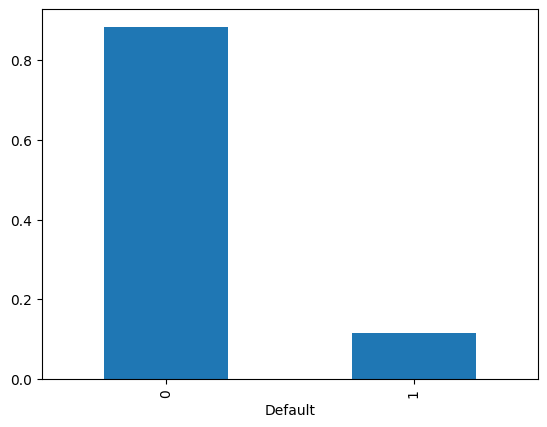

In [53]:
train_df['Default'].value_counts(normalize=True).plot(kind='bar')  
#we can clearly that's a lot of imbalance


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'LoanAmount'}>],
       [<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'MonthsEmployed'}>,
        <Axes: title={'center': 'NumCreditLines'}>],
       [<Axes: title={'center': 'InterestRate'}>,
        <Axes: title={'center': 'LoanTerm'}>,
        <Axes: title={'center': 'DTIRatio'}>]], dtype=object)

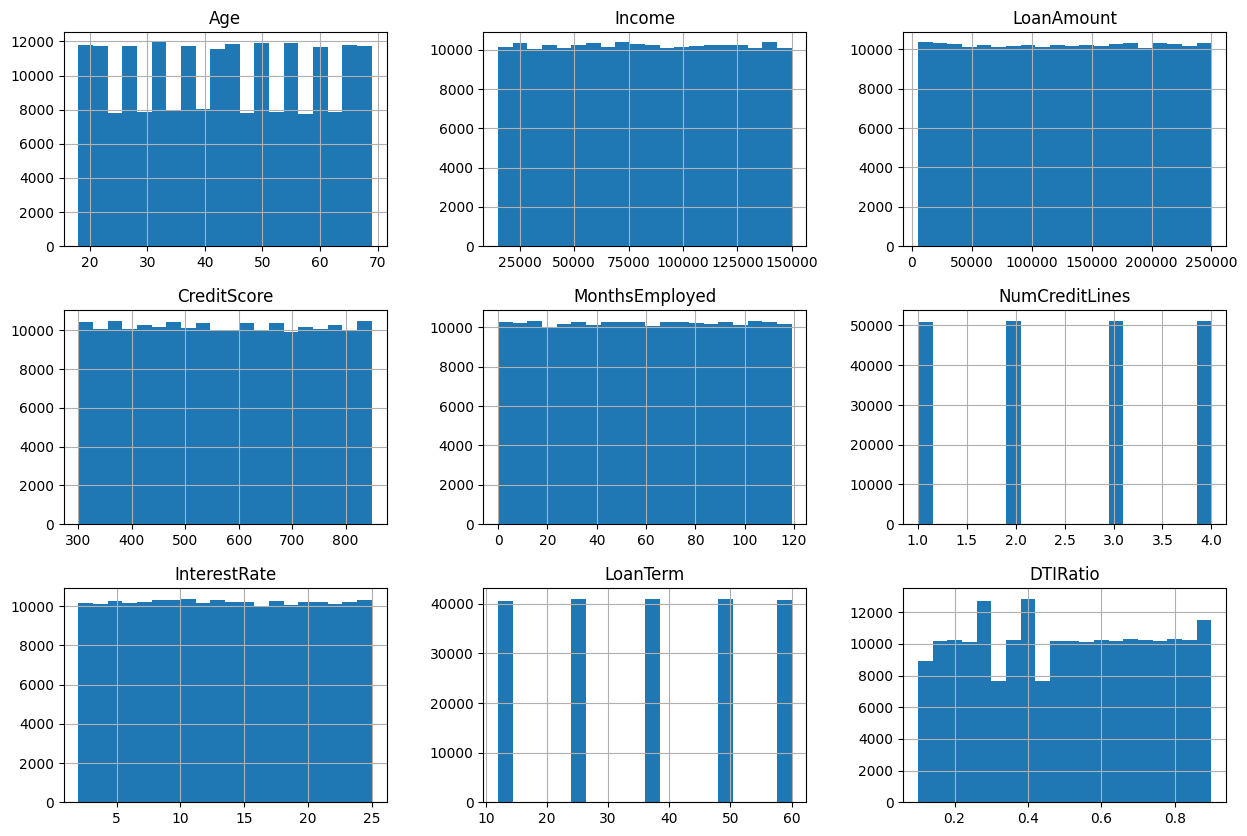

In [54]:
numeric_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
train_df[numeric_columns].hist(bins=20, figsize=(15, 10))
# all numeric columns are well distributed, ther's no big imbalance in these

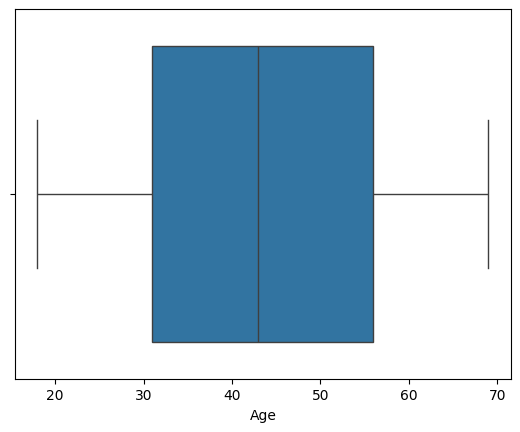

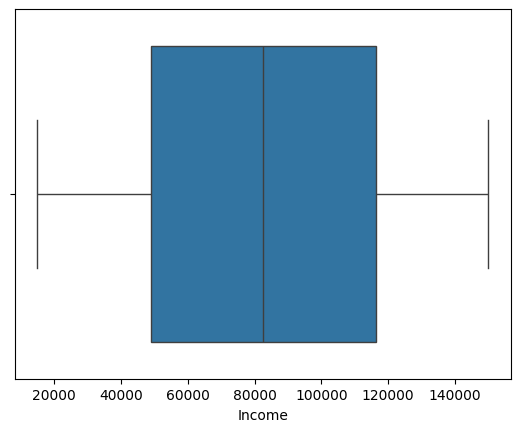

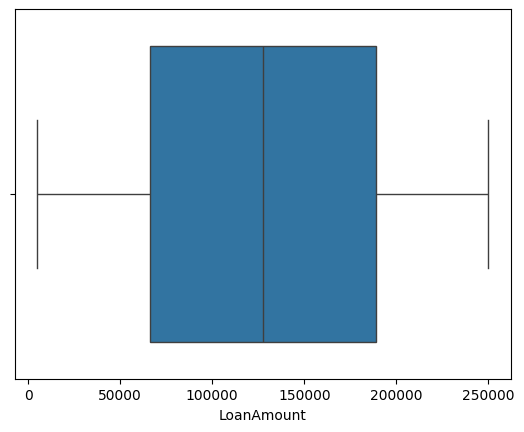

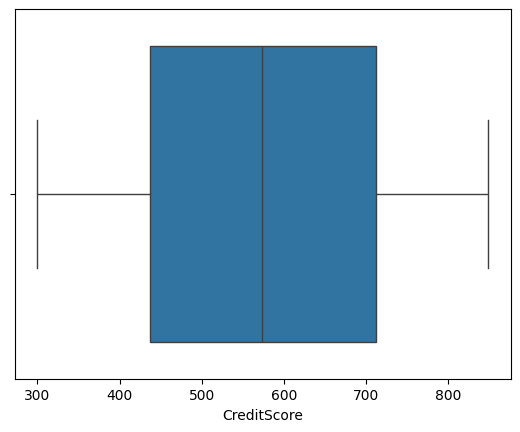

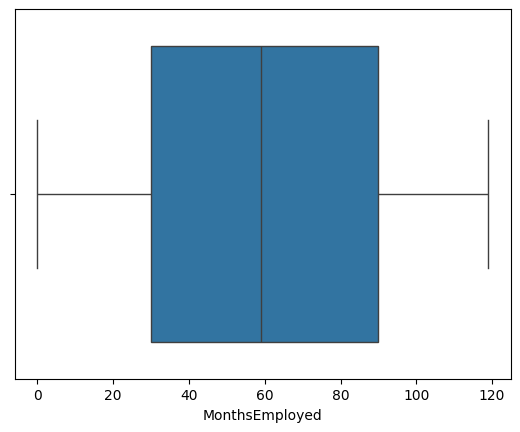

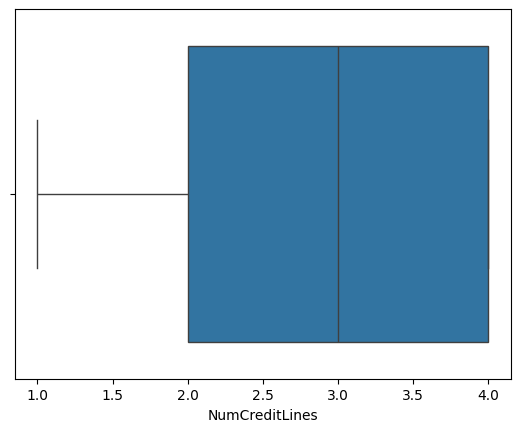

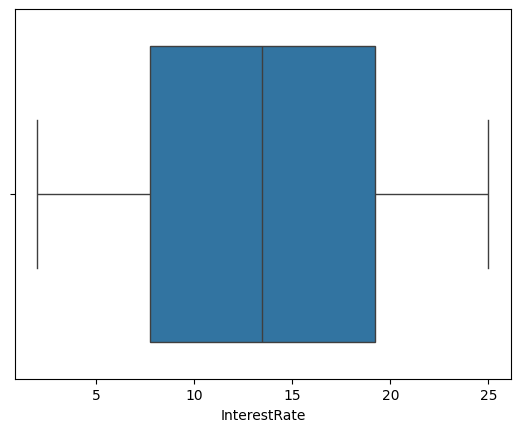

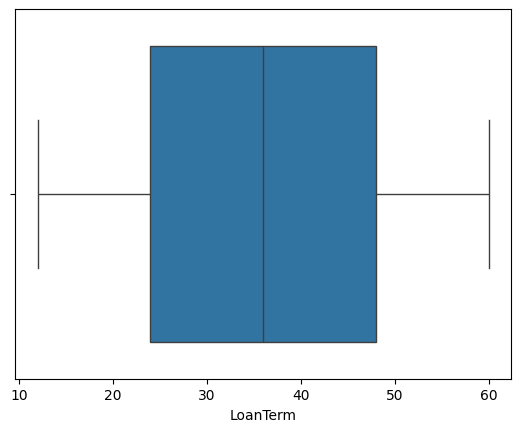

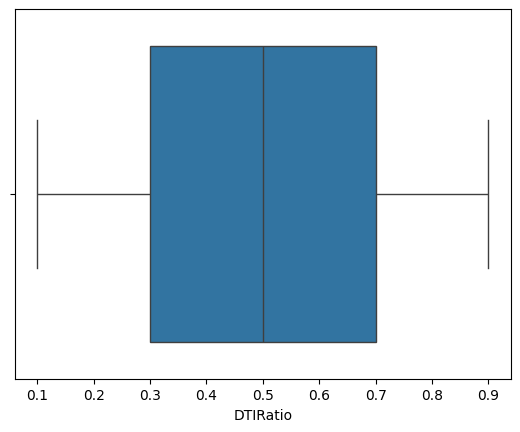

In [55]:
for column in numeric_columns:
    sns.boxplot(data=train_df, x=column)
    plt.show()
# no outliers in any numeric columns

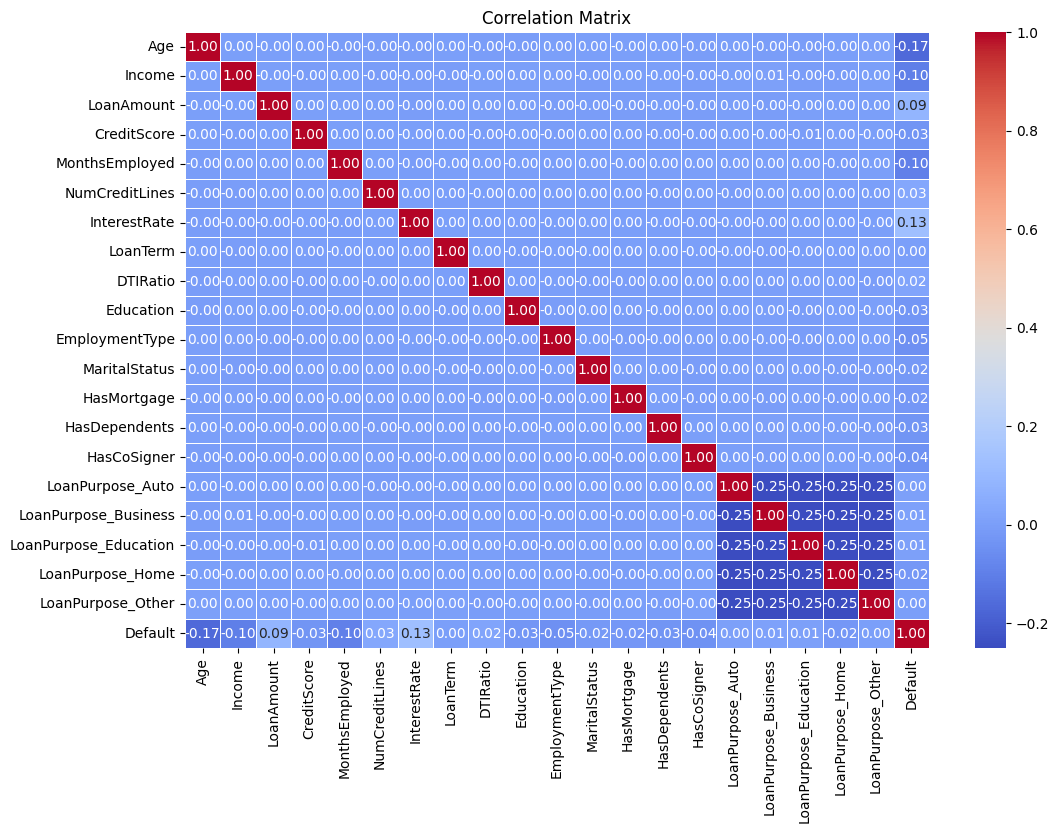

In [56]:
# Select only numeric columns
numeric_columns = train_df.select_dtypes(include=['number']).columns

# Compute correlation matrix for numeric features
corr_matrix = train_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
# this didn't reveal any strong signals, we didn't find any features that are highly correlated
#so feature extraction might not help in increasing the model performance, but let's try that too.

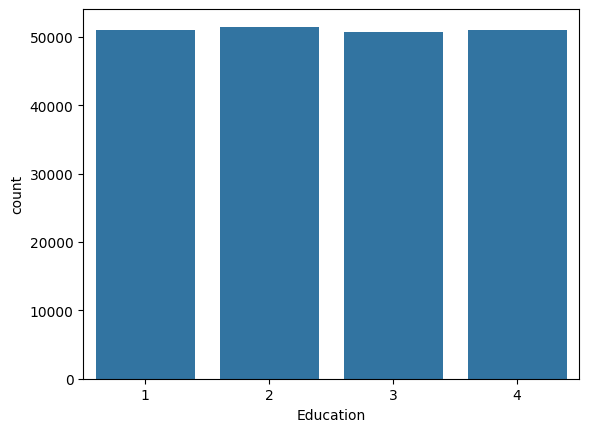

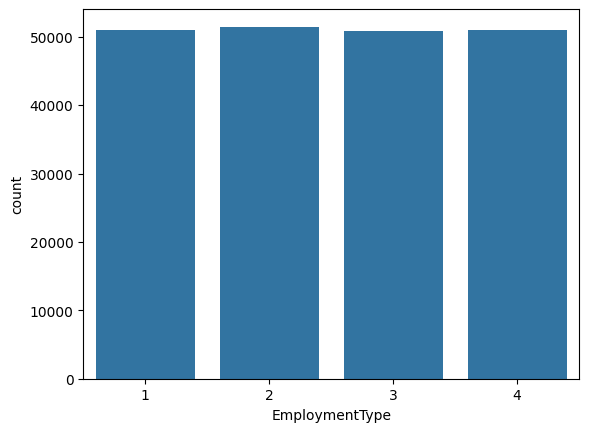

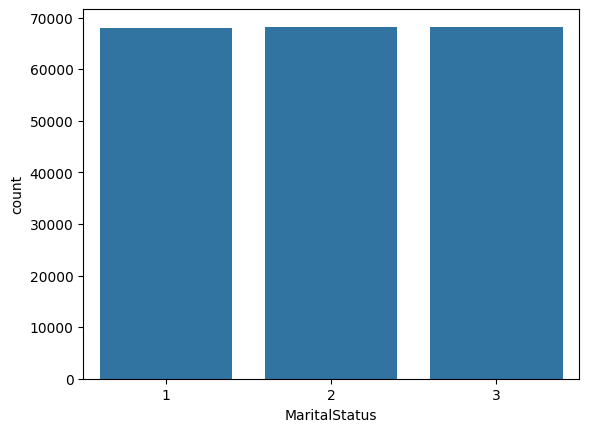

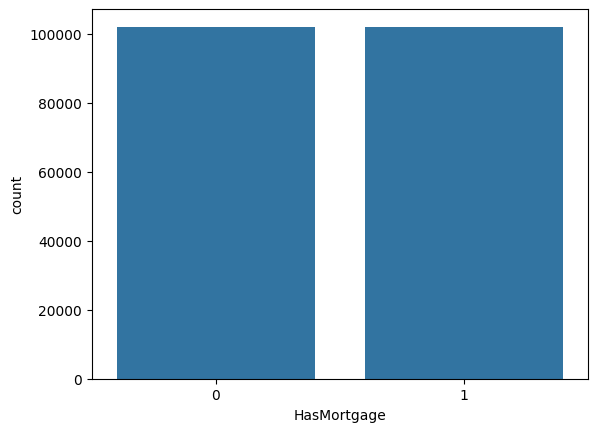

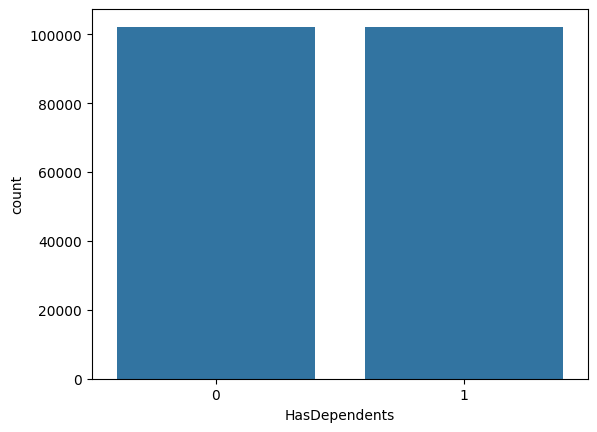

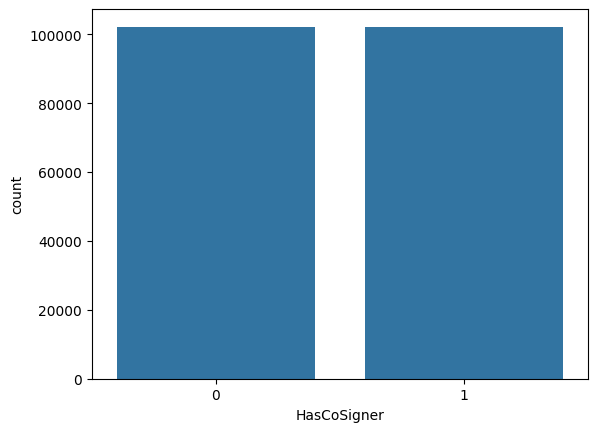

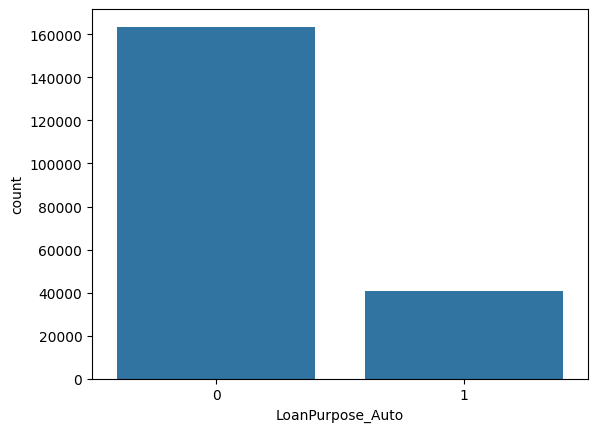

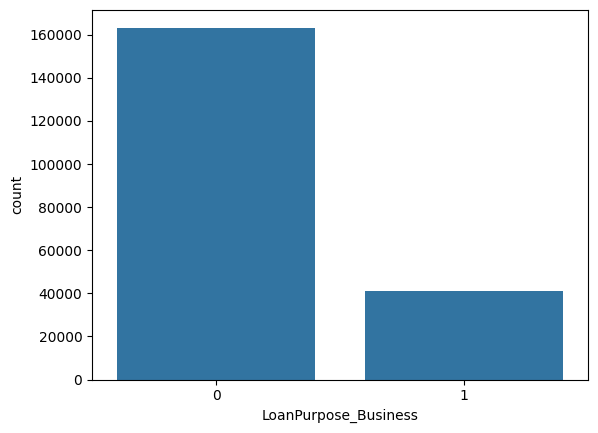

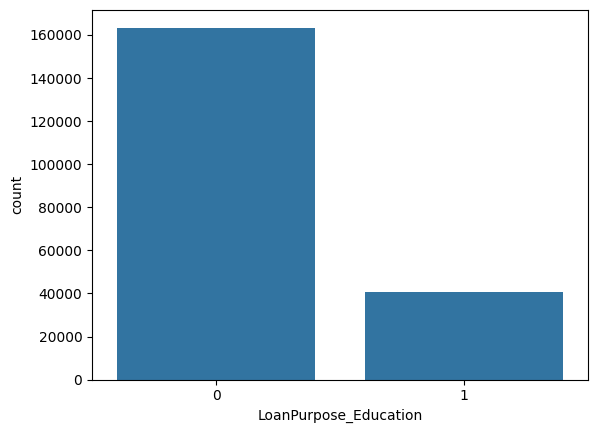

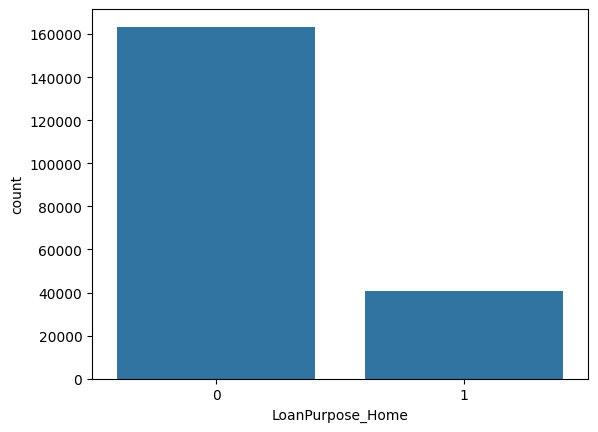

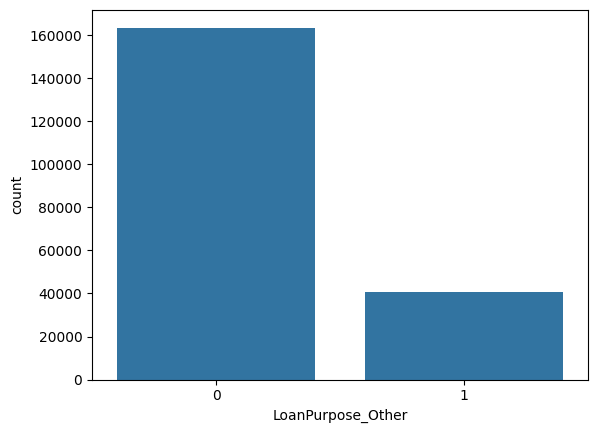

In [57]:
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'LoanPurpose_Auto', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other']
for column in categorical_columns:
    sns.countplot(data=train_df, x=column)
    plt.show()
#clearly there are no imbalances, the imbalance in loan purpose is because we did one-hot encoding

# feature 1 loantoIncomeratio #

In [58]:
train_df['LoanToIncomeRatio'] = train_df['LoanAmount'] / train_df['Income']
test_df['LoanToIncomeRatio'] = test_df['LoanAmount'] / test_df['Income']

# feature 2 agegroup #

In [59]:
#bins = [0, 30, 50, 100]  # Define age bins
#labels = [1, 2, 3]  # Define labels as 1, 2, and 3
#train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)
#train_df['AgeGroup'] = train_df['AgeGroup'].astype(int)
#test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)
#test_df['AgeGroup'] = test_df['AgeGroup'].astype(int)
#got 0 feature importance so removing this

In [60]:
train_df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasMortgage,HasDependents,HasCoSigner,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Default,LoanToIncomeRatio
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,...,1,0,0,0,1,0,0,0,0,1.520149
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,...,0,1,0,0,0,1,0,0,0,0.104382
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,...,0,0,1,0,0,0,0,1,0,1.127324
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,...,1,0,1,1,0,0,0,0,1,4.610543
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,...,0,1,1,0,0,1,0,0,0,0.191182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,...,0,0,1,0,0,0,1,0,0,1.386287
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,...,0,0,1,0,1,0,0,0,0,3.009927
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,...,1,0,0,1,0,0,0,0,0,1.735279
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,...,1,0,0,0,0,0,1,0,0,1.356839


# feature 3 interest loan interaction #

In [61]:
train_df['InterestLoanInteraction'] = train_df['InterestRate'] * train_df['LoanAmount']
test_df['InterestLoanInteraction'] = test_df['InterestRate'] * test_df['LoanAmount']

# feature 4 loantointerestratio #

In [62]:
train_df['LoanToInterestRatio'] = train_df['LoanAmount'] / (train_df['InterestRate'] + 1)  # add 1 to avoid division by zero
test_df['LoanToInterestRatio'] = test_df['LoanAmount'] / (test_df['InterestRate'] + 1)  # add 1 to avoid division by zero
#got only 0.03 correlation with default, so not worth adding.

# feature 5 interesttoincomeratio #

In [63]:
# Compute Interest-to-Income Ratio
train_df['InterestToIncomeRatio'] = (train_df['InterestRate'] * train_df['LoanAmount']) / train_df['Income']
test_df['InterestToIncomeRatio'] = (test_df['InterestRate'] * test_df['LoanAmount']) / test_df['Income']

# feature 6 emplyment stability #

In [64]:
# Employment Stability categorization with numerical encoding
#def categorize_employment_stability(months):
#    if months <= 12:
#        return 1  # Short-term
#    elif 13 <= months <= 60:
#        return 2  # Mid-term
#    else:
#        return 3  # Long-term

# Apply the function to create the new feature with numerical encoding
#train_df['EmploymentStability'] = train_df['MonthsEmployed'].apply(categorize_employment_stability)
#test_df['EmploymentStability'] = test_df['MonthsEmployed'].apply(categorize_employment_stability)
# got 0 feature importance,so removing this

# feature 7 and 8 #

In [65]:
# Create the Credit-to-Income Ratio feature
train_df['CreditToIncomeRatio'] = train_df['CreditScore'] / train_df['Income']
test_df['CreditToIncomeRatio'] = test_df['CreditScore'] / test_df['Income']

# Create the Loan Size-to-Interest Rate feature
train_df['LoanSizeToInterestRatio'] = train_df['LoanAmount'] / train_df['InterestRate']
test_df['LoanSizeToInterestRatio'] = test_df['LoanAmount'] / test_df['InterestRate']

# Check the first few rows to confirm the new features are added
print(train_df[['CreditToIncomeRatio', 'LoanSizeToInterestRatio']].head())
print(test_df[['CreditToIncomeRatio', 'LoanSizeToInterestRatio']].head())


   CreditToIncomeRatio  LoanSizeToInterestRatio
0             0.006149             19974.785100
1             0.013078               302.738337
2             0.005372              3920.206186
3             0.010704             15899.030471
4             0.007276               901.633987
   CreditToIncomeRatio  LoanSizeToInterestRatio
0             0.005157              3924.936279
1             0.007000              8661.948650
2             0.007279              4185.183130
3             0.005172               734.466349
4             0.022316              1410.252996


In [66]:
#train_df['IncomeToMonthsEmployedRatio'] = train_df['Income'] / train_df['MonthsEmployed']
#test_df['IncomeToMonthsEmployedRatio'] = test_df['Income'] / test_df['MonthsEmployed']
# Step 1: Compute Age-to-Loan Amount Ratio
#train_df['AgeToLoanAmountRatio'] = train_df['Age'] / train_df['Income']

# Step 2: Apply the same to test_df (assuming you have a test_df)
#test_df['AgeToLoanAmountRatio'] = test_df['Age'] / test_df['Income']
train_df


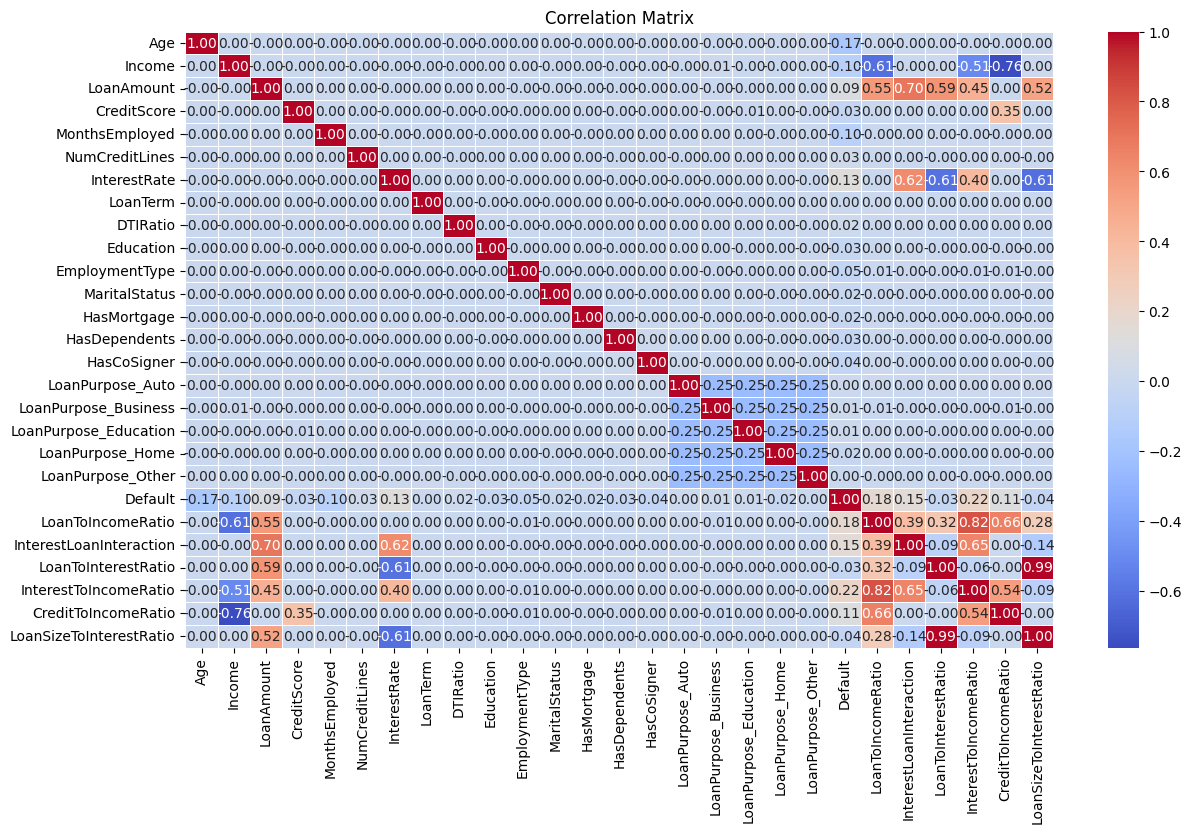

In [67]:
# Select only numeric columns
numeric_columns = train_df.select_dtypes(include=['number']).columns

# Compute correlation matrix for numeric features
corr_matrix = train_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
# this didn't reveal any strong signals, we didn't find any features that are highly correlated
#so feature extraction might not help in increasing the model performance, but let's try that too.